In [1]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1 Load the data into python

In [2]:
df = pd.read_excel("Resume_Data.excel.xlsx")
df['Cleaned_Resume'] = ' '
df.head()

,Category,Resume,Cleaned_Resume
0,NaN,False,
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,False,
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",


In [3]:
print ("Resume Categories")
print (df['Category'].value_counts())

Resume Categories
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Mechanical Engineer          40
Sales                        40
Operations Manager           40
Data Science                 39
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


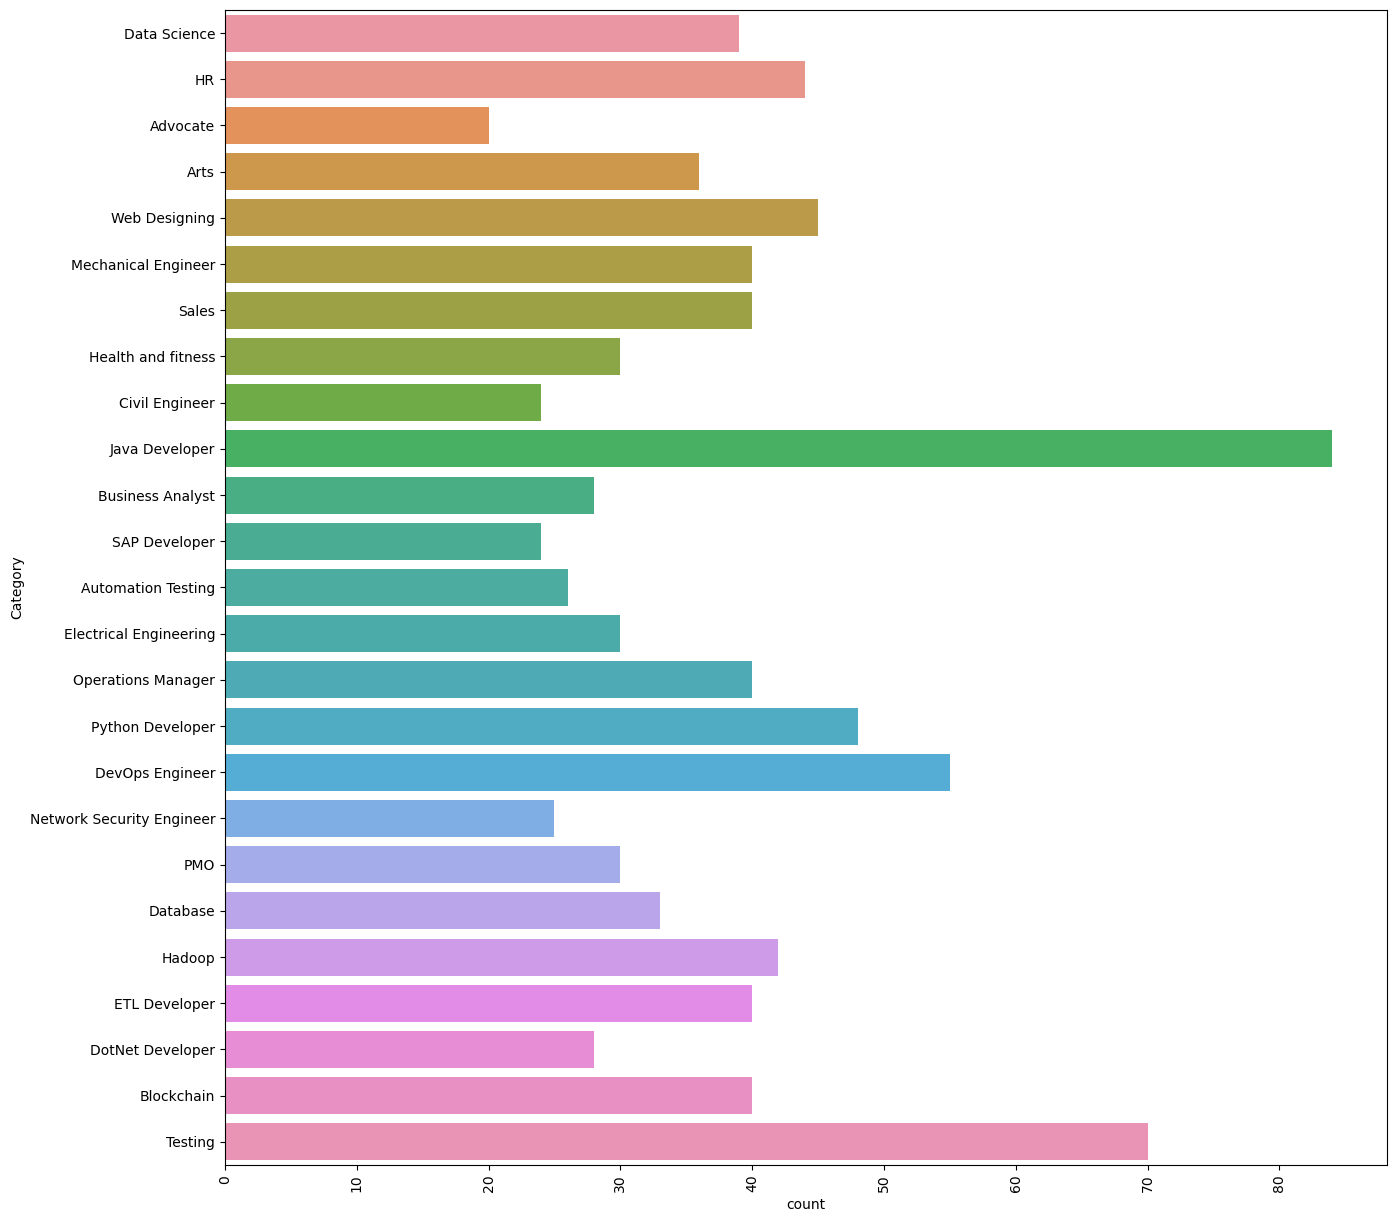

In [4]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df)
plt.show()

In [5]:
df["Resume"][2]

'Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \nJanuary 2019 B.Tech. Electrical and Electronics Engineering  Manipal Institute of Technology\nJanuary 2015    DEEKSHA CENTER\nJanuary 2013    Little Flower Public School\nAugust 2000    Manipal Academy of Higher\nDATA SCIENCE \n\nDATA SCIENCE AND ELECTRICAL ENTHUSIAST\nSkill Details \nData Analysis- Exprience - Less 

In [6]:
df["Resume"][500]

False

## 2. Cleaning and preprocessing the resume text

In [53]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

df['Cleaned_Resume'] = df.Resume.apply(lambda x: cleanResume(x))

TypeError: expected string or bytes-like object

In [8]:
df['Cleaned_Resume'][2]

' '

In [9]:
df.head()

,Category,Resume,Cleaned_Resume
0,NaN,False,
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,False,
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",


In [10]:
len(df)

962

## 3. Performing the NLP tasks on the cleaned text

In [11]:
corpus=" "

for i in range(0,962):
    corpus= corpus+ df["Cleaned_Resume"][i]

In [12]:
corpus[1000:2500]

''

In [13]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(corpus)

len(tokens)

0

In [14]:
words = []
for word in tokens:
    words.append(word.lower())

In [15]:
stopwords = nltk.corpus.stopwords.words('english')

words_new = []

for word in words:
    if word not in stopwords:
        words_new.append(word)

In [16]:
len(words_new)

0

In [17]:
from nltk.stem import WordNetLemmatizer

wn = WordNetLemmatizer()

lem_words=[]

for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)

In [18]:
len(lem_words)

0

In [19]:
same=0
diff=0

for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1

print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

IndexError: list index out of range

## 4. Find the frequency distribution of the words

In [20]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(lem_words)

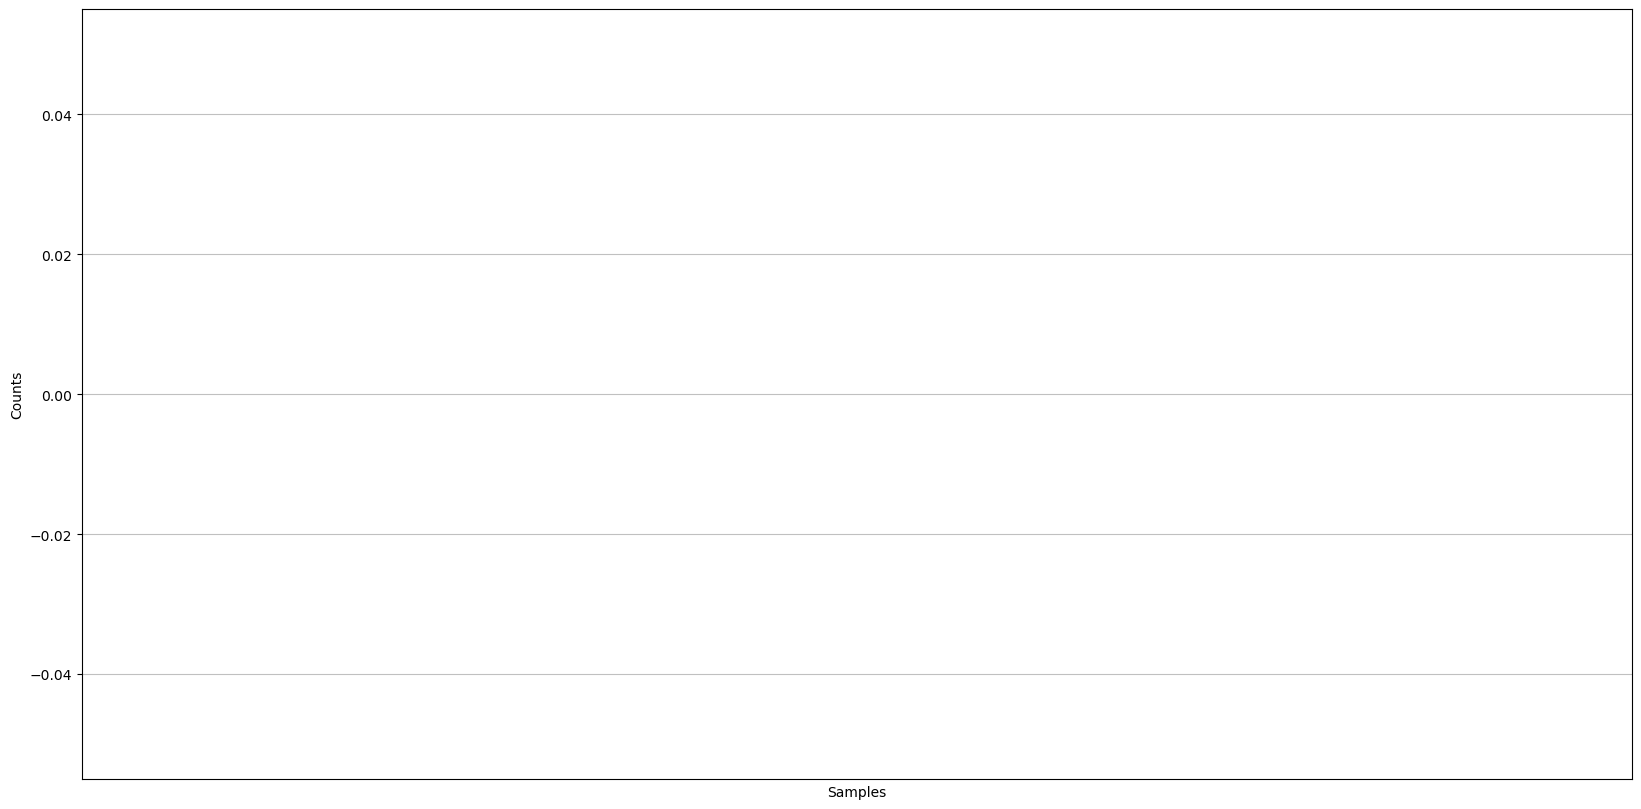

In [21]:
plt.subplots(figsize=(20,10))
freq_dist.plot(20)
plt.show()

In [22]:
len(freq_dist)

0

In [23]:
mostcommon = freq_dist.most_common(50)

In [24]:
mostcommon

[]

## 5. Building the word cloud with the corpus

In [25]:
#converting into string

res=' '.join([i for i in lem_words if not i.isdigit()])

In [29]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


ValueError: We need at least 1 word to plot a word cloud, got 0.

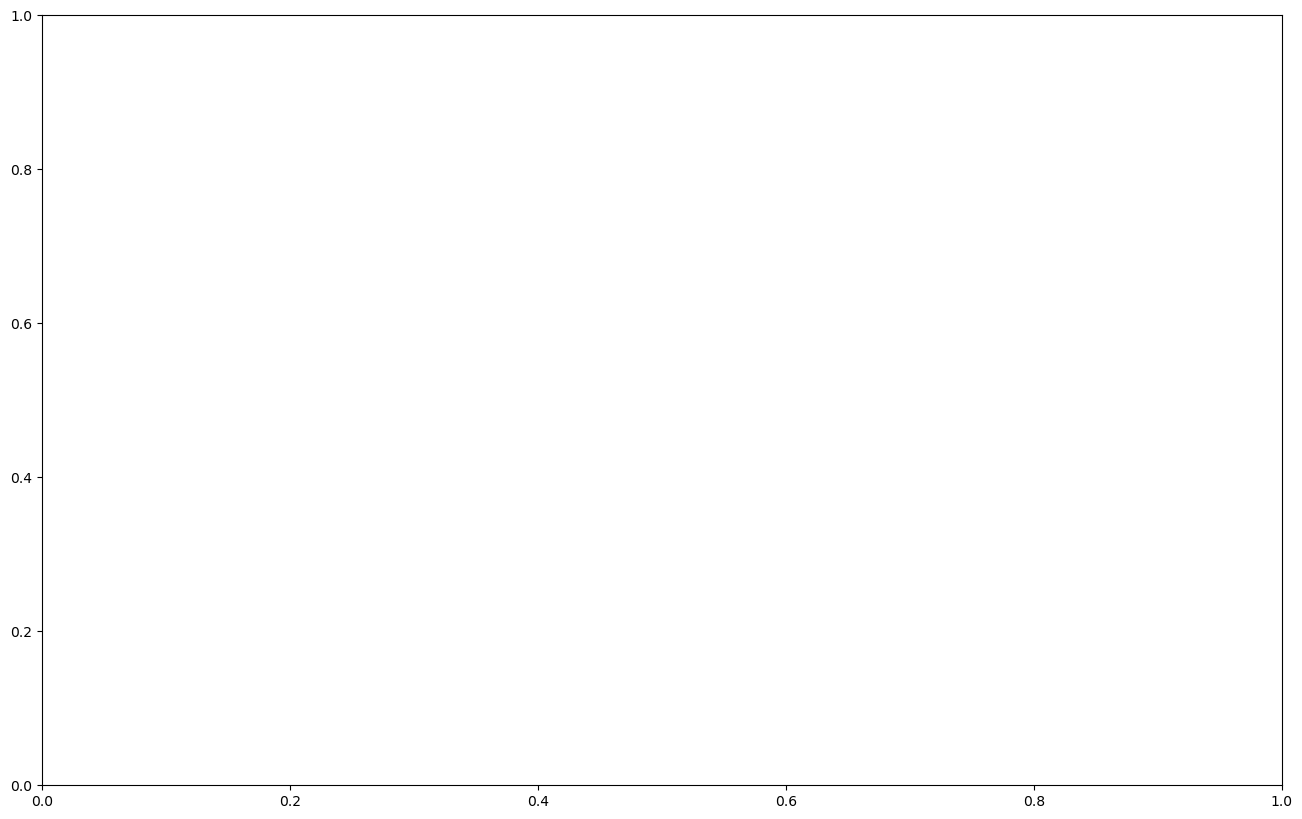

In [49]:
from wordcloud import WordCloud
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(background_color='white',
                          max_words=100,
                          width=1100,
                          height=1300
                      ).generate(res)

plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (80 Words)')
plt.axis('off')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

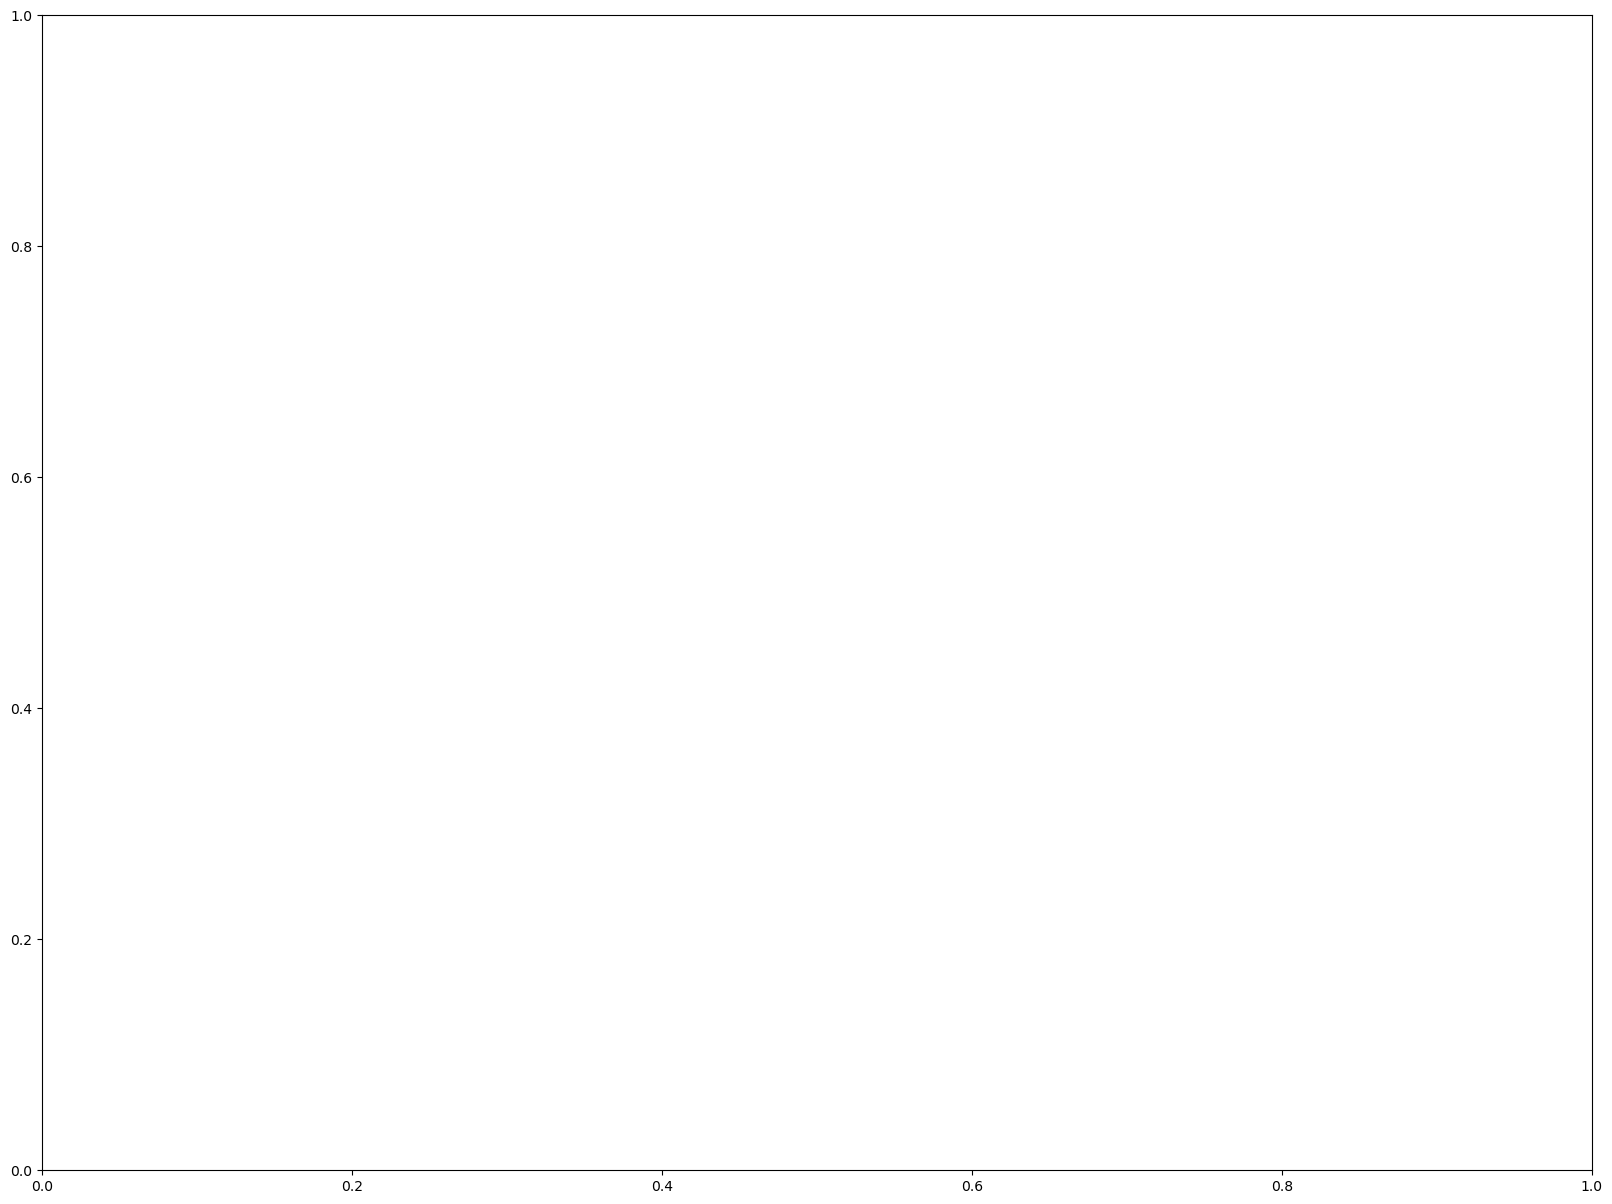

In [31]:

plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (200 Words)')
plt.axis('off')
plt.show()

## 6. Filter the resume data for a specific category of Data Science

In [32]:
data_science= df[df["Category"]=="Data Science"]

In [33]:
data_science.head()

,Category,Resume,Cleaned_Resume
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,False,
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",


In [34]:
len(data_science)

39

In [35]:
data_science["Cleaned_Resume"]

1      
2      
3      
4      
5      
6      
7      
8      
9      
10     
11     
12     
13     
14     
15     
16     
17     
18     
19     
20     
21     
22     
23     
24     
25     
26     
27     
28     
29     
30     
31     
32     
33     
34     
35     
36     
37     
38     
39     
Name: Cleaned_Resume, dtype: object

## 7. Create a corpus for data science resume text.

In [36]:
data_science_corpus = " "

for index, row in data_science.iterrows():
    data_science_corpus += row['Cleaned_Resume']

In [37]:
data_science_corpus=data_science_corpus.lower()

In [38]:
words_data_science=data_science_corpus.split()

## 8. Find the frequencies of the important skills in Data science

In [39]:
print('Frequency of "python"  is :', words_data_science.count("python"))

Frequency of "python"  is : 0


In [40]:
print('Frequency of "sap"  is :', words_data_science.count("sap"))

Frequency of "sap"  is : 0


In [41]:
print('Frequency of "analysis"  is :', words_data_science.count("analysis"))

Frequency of "analysis"  is : 0


In [42]:
print('Frequency of "sql"  is :', words_data_science.count("sql"))

Frequency of "sql"  is : 0


In [43]:
print('Frequency of "experience"  is :', words_data_science.count("experience"))

Frequency of "experience"  is : 0
